In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.compose import ColumnTransformer
import numpy as np
import seaborn as sns

In [3]:
raw_data=pd.read_csv("medical_students_dataset.csv")
raw_data.sort_values("Student ID",inplace=True)
raw_data=raw_data.applymap(lambda x: np.nan if x is None else x)
#raw_data = raw_data.where(pd.notna(raw_data), None)
raw_data.head(10)


C:\Users\ahmad\AppData\Local\Temp\ipykernel_4552\1118038242.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  raw_data=raw_data.applymap(lambda x: np.nan if x is None else x)


,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
100001,2.0,34.0,Male,152.069157,47.630941,B,20.597139,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
100003,4.0,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No
100004,5.0,23.0,Female,179.339293,46.234173,O,14.375143,98.480008,95.0,139.0,231.0,No,No
5,6.0,32.0,NaN,151.491294,68.647805,B,29.912403,99.668373,70.0,128.0,183.0,NaN,Yes
100005,6.0,32.0,Female,NaN,NaN,B,29.912403,99.668373,70.0,128.0,183.0,No,Yes
6,7.0,21.0,NaN,172.949704,48.102744,AB,16.081635,97.715469,66.0,134.0,247.0,No,No


as you can see data includes null values and dublicates.


In [4]:
raw_data.sort_values("Student ID")

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
100001,2.0,34.0,Male,152.069157,47.630941,B,20.597139,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
100003,4.0,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199917,NaN,30.0,Male,160.993293,48.725905,B,18.799416,98.220218,NaN,91.0,139.0,No,No
199940,NaN,30.0,NaN,158.451908,75.739627,AB,30.166729,98.089516,73.0,108.0,143.0,No,No
199941,NaN,NaN,NaN,167.192837,50.169768,NaN,17.947616,97.584901,81.0,107.0,244.0,No,Yes
199956,NaN,21.0,Female,NaN,91.240475,B,30.272756,NaN,71.0,98.0,176.0,No,Yes


we should be sure that data inclueds dublicates

In [5]:
raw_data.drop_duplicates(inplace=True)
raw_data[raw_data["Student ID"]==8]

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
7,8.0,28.0,Male,186.489402,52.389752,AB,15.063921,98.227788,85.0,123.0,128.0,No,No


we removed doblicate and test to be sure we remove right values and keep one of the dublicate data

In [6]:
def check_nulls():
    nul_vals=pd.DataFrame(pd.isnull(raw_data).sum(axis=0),columns=["total nulvalues"])
    nul_vals["percent"]=pd.isnull(raw_data).sum(axis=0)/len(raw_data)
    print(nul_vals)
check_nulls()

                total nulvalues   percent
Student ID                19891  0.103407
Age                       19892  0.103412
Gender                    19924  0.103579
Height                    19907  0.103490
Weight                    19901  0.103459
Blood Type                19916  0.103537
BMI                       19900  0.103454
Temperature               19911  0.103511
Heart Rate                19903  0.103470
Blood Pressure            19892  0.103412
Cholesterol               19893  0.103418
Diabetes                  19905  0.103480
Smoking                   19897  0.103438


as you can see, in each raw we have around 10 percent of data is null, so we cannot remove them. instead, first we shouyld try to recalculate null values in BMI.

In [7]:
import math
def BMI_fixer(row):
    if pd.isna(row["BMI"]):
        if ~pd.isna(row["Height"]):
            if ~pd.isna(row["Weight"]):
                row["BMI"]=row["Weight"]/(row["Height"]**2)

    if pd.isna(row["Height"]):
        if ~pd.isna(row["BMI"]):
            if ~pd.isna(row["Weight"]):
                row["Height"]= math.sqrt(row["Weight"]/row["BMI"])

    if pd.isna(row["Weight"]):
        if ~pd.isna(row["BMI"]):
            if ~pd.isna(row["Height"]):
                row["Weight"]=(row["Height"]**2)* row["BMI"] 
    return row
raw_data["Height"]=round(raw_data["Height"]/100,2)
raw_data = raw_data.where(pd.notna(raw_data), None)
raw_data=raw_data.apply(lambda x: BMI_fixer(x),axis=1)  

we can calculate BMI based on weight and height, so if one of the columns is null we can calculate that with other columns

In [8]:
check_nulls()


                total nulvalues   percent
Student ID                19891  0.103407
Age                       19892  0.103412
Gender                    19924  0.103579
Height                     3761  0.019552
Weight                     3771  0.019604
Blood Type                19916  0.103537
BMI                        3771  0.019604
Temperature               19911  0.103511
Heart Rate                19903  0.103470
Blood Pressure            19892  0.103412
Cholesterol               19893  0.103418
Diabetes                  19905  0.103480
Smoking                   19897  0.103438


now we can remove remaining null valus in BMI because the number of nulls is less than 5 %, Also remove height and weight, because we can use BNI instead of them

In [9]:
raw_data.dropna(subset=['BMI'],inplace=True)
raw_data.drop(["Height","Weight","Student ID"],axis=1,inplace=True)

Removing useless columns

In [10]:
rows=pd.DataFrame()
for column in raw_data.columns[raw_data.dtypes=="float64"]:
    q75=raw_data[column].quantile(0.75)
    q25=raw_data[column].quantile(0.25)
    iqr=q75-q25
    upper=q75+(1.5*iqr)
    lower=q25-(1.5*iqr)
    rows=pd.concat([rows,raw_data[(raw_data[column]>upper)|(raw_data[column]<lower)]])
    
raw_data.drop(rows.index,inplace=True)

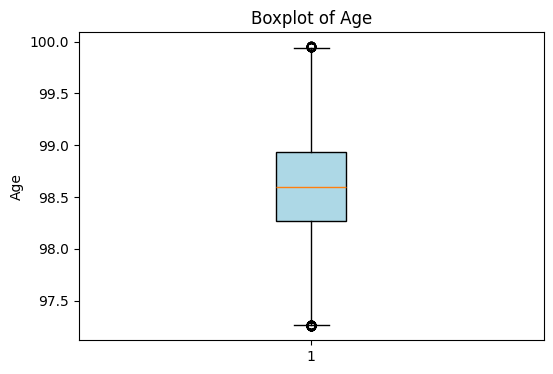

In [11]:
plt.figure(figsize=(6, 4))  # Optional: Set the figure size
plt.boxplot(raw_data["Temperature"].dropna(), vert=True, patch_artist=True, boxprops=dict(facecolor="lightblue"))

# Add labels and title
plt.title("Boxplot of Age")
plt.ylabel("Age")

# Show the plot
plt.show()

manage outliers that may have neetive impact in our data

(array([6.8710e+04, 7.4552e+04, 3.3499e+04, 0.0000e+00, 8.7500e+03,
        1.4770e+03, 0.0000e+00, 1.5400e+02, 1.2000e+01, 1.0000e+00]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

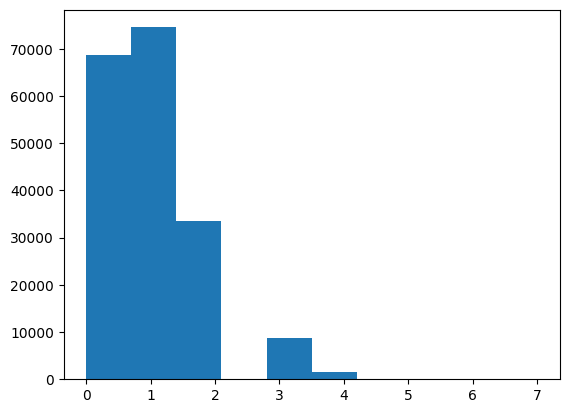

In [12]:

plt.hist(raw_data.isnull().sum(axis=1))

In [13]:
raw_data.drop(raw_data[raw_data.isnull().sum(axis=1)>3].index,inplace=True)

(array([68710.,     0.,     0., 74552.,     0.,     0., 33499.,     0.,
            0.,  8750.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

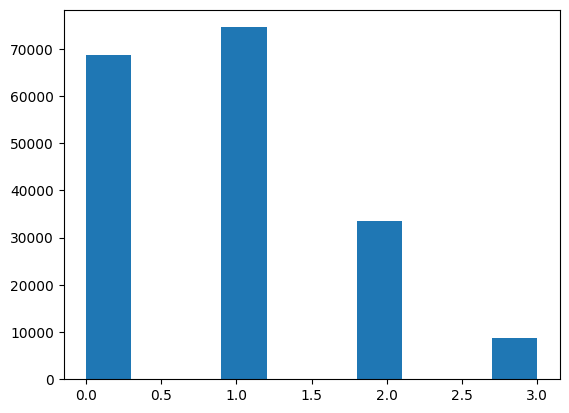

In [14]:
plt.hist(pd.isnull(raw_data).sum(axis=1))

removing columns with more than three null values for each rows

In [15]:

y_data=raw_data[["Blood Pressure"]]
x_data=raw_data.drop(["Blood Pressure"],axis=1)

x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,train_size=0.8,random_state=42)

numXT_imputer=SimpleImputer(strategy="mean")
numXTr_data=numXT_imputer.fit_transform(x_train[["Age","Temperature","Heart Rate","Cholesterol","BMI"]])
numXTst_data=numXT_imputer.transform(x_test[["Age","Temperature","Heart Rate","Cholesterol","BMI"]])
pip=ColumnTransformer(transformers=[("standardscaler",StandardScaler(),["Age","Temperature","Heart Rate","Cholesterol"]),
     ("MinMax",MinMaxScaler(),["BMI"])])
numXTr_data=pip.fit_transform(pd.DataFrame(numXTr_data,columns=["Age","Temperature","Heart Rate","Cholesterol","BMI"]))
numXTst_data=pip.transform(pd.DataFrame(numXTst_data,columns=["Age","Temperature","Heart Rate","Cholesterol","BMI"]))

cat_imputer=SimpleImputer(strategy="most_frequent")
x_train[["Gender", "Blood Type", "Diabetes", "Smoking"]] = x_train[["Gender", "Blood Type", "Diabetes", "Smoking"]].applymap(lambda x: np.nan if x is None else x)
x_test[["Gender", "Blood Type", "Diabetes", "Smoking"]] = x_test[["Gender", "Blood Type", "Diabetes", "Smoking"]].applymap(lambda x: np.nan if x is None else x)
catXTr_data=cat_imputer.fit_transform(x_train[["Gender","Blood Type","Diabetes","Smoking"]])
catXTst_data=cat_imputer.transform(x_test[["Gender","Blood Type","Diabetes","Smoking"]])


numYT_imputer=SimpleImputer(strategy="mean")
numYTr_data=numYT_imputer.fit_transform(y_train[["Blood Pressure"]])
numYTst_data=numYT_imputer.transform(y_test[["Blood Pressure"]])

nx_train=pd.concat([pd.DataFrame(numXTr_data,columns=["Age","Temperature","Heart Rate","Cholesterol","BMI"]),pd.DataFrame(catXTr_data,columns=["Gender","Blood Type","Diabetes","Smoking"])], axis=1)
nx_test=pd.concat([pd.DataFrame(numXTst_data,columns=["Age","Temperature","Heart Rate","Cholesterol","BMI"]),pd.DataFrame(catXTst_data,columns=["Gender","Blood Type","Diabetes","Smoking"])], axis=1)


C:\Users\ahmad\AppData\Local\Temp\ipykernel_4552\4047872196.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  x_train[["Gender", "Blood Type", "Diabetes", "Smoking"]] = x_train[["Gender", "Blood Type", "Diabetes", "Smoking"]].applymap(lambda x: np.nan if x is None else x)
C:\Users\ahmad\AppData\Local\Temp\ipykernel_4552\4047872196.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  x_test[["Gender", "Blood Type", "Diabetes", "Smoking"]] = x_test[["Gender", "Blood Type", "Diabetes", "Smoking"]].applymap(lambda x: np.nan if x is None else x)


first we divide data in test and train,
second, in train set we try to fill null values in both categorical and numeric data
third, we doing the same for test dataset
the reason for doing imputer after dividing data in test and train, is to protect the process from data leakage

In [16]:
nx_train["Gender"]=nx_train["Gender"].replace({"Male":1,"Female":0})
nx_train[["Diabetes","Smoking"]]=nx_train[["Diabetes","Smoking"]].replace({"Yes":1,"No":0})  
nx_train=pd.concat([nx_train,pd.get_dummies(nx_train["Blood Type"],prefix="Blood Type: ").replace({True:1,False:0})],axis=1).drop(["Blood Type"],axis=1)  

nx_test["Gender"]=nx_test["Gender"].replace({"Male":1,"Female":0})
nx_test[["Diabetes","Smoking"]]=nx_test[["Diabetes","Smoking"]].replace({"Yes":1,"No":0})  
nx_test=pd.concat([nx_test,pd.get_dummies(nx_test["Blood Type"],prefix="Blood Type: ").replace({True:1,False:0})],axis=1).drop(["Blood Type"],axis=1) 

finally we try to convert all categoricall data in numeric data to be able use numeric methods like NN or regression models.

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
lr=LinearRegression()
lr.fit(nx_train,numYTr_data)
y_pred=lr.predict(nx_test)
r2=lr.score(nx_test,numYTst_data)
mae=mean_absolute_error(numYTst_data,y_pred)
mse=mean_squared_error(numYTst_data,y_pred)
print("R2:",r2)
print("mae:",mae)
print("mse:",mse)

R2: -9.13436263849654e-06
mae: 11.23529831072197
mse: 187.1327172349415


<Axes: >

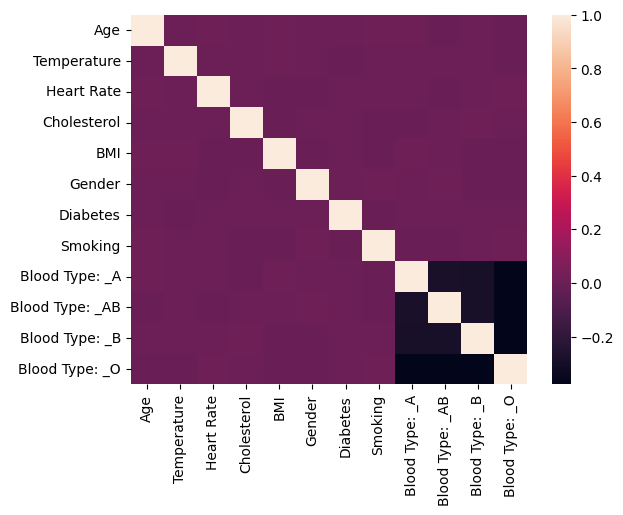

In [30]:
sns.heatmap(nx_train.corr())

In [39]:
from sklearn.preprocessing import PolynomialFeatures
polyfeat=PolynomialFeatures(degree=2,include_bias=False)
pnx_train=polyfeat.fit_transform(nx_train)
poly_feature_names =polyfeat.get_feature_names_out(input_features=nx_train.columns)
pnx_train_df = pd.DataFrame(pnx_train,columns=poly_feature_names)
corr=pnx_train_df.corr()


In [ ]:
from sklearn.feature_selection import RFE
rfe=RFE(estimator=LinearRegression(),n_features_to_select=10)
rfe.fit(pnx_train_df,numYTr_data)


RFE(estimator=LinearRegression(), n_features_to_select=10)

In [59]:
column_ranking_dict=dict(zip(pnx_train_df.columns,rfe.ranking_))
filtered_columns = {col: rank for col, rank in column_ranking_dict.items() if rank <= 10}

# Print the filtered columns
print(filtered_columns)

{'Heart Rate': 5, 'Gender': 1, 'Blood Type: _AB': 1, 'Blood Type: _B': 1, 'Temperature Blood Type: _A': 8, 'Temperature Blood Type: _AB': 10, 'Temperature Blood Type: _B': 7, 'Temperature Blood Type: _O': 9, 'Heart Rate Blood Type: _A': 2, 'Heart Rate Blood Type: _AB': 6, 'Heart Rate Blood Type: _B': 4, 'Heart Rate Blood Type: _O': 3, 'Gender^2': 1, 'Gender Blood Type: _A': 1, 'Gender Blood Type: _AB': 1, 'Gender Blood Type: _B': 1, 'Gender Blood Type: _O': 1, 'Blood Type: _AB^2': 1, 'Blood Type: _B^2': 1}


In [75]:
pnx_test=polyfeat.transform(nx_test)

mae=mean_absolute_error(numYTst_data,rfe.predict(pnx_test))
mse=mean_squared_error(numYTst_data,rfe.predict(pnx_test))

print("mae:",mae)
print("mse:",mse)

mae: 11.241244515787075
mse: 187.1227628752128


C:\Users\ahmad\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RFE was fitted with feature names
  warnings.warn(
C:\Users\ahmad\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RFE was fitted with feature names
  warnings.warn(
